In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

data = pd.read_csv("Arthur Morgan.csv")

print(data.head())

                  name                                               line
0      Orville Swanson   Abigail says he’s dying, Dutch. We’ll have to...
1  Dutch van der Linde   Okay. Arthur’s out looking, I sent him up ahead.
2       Hosea Matthews   If we don’t stop soon, we’ll all be dying. Th...
3  Dutch van der Linde                           There. Arthur! Any luck?
4        Arthur Morgan   I found a place where we can get some shelter...


In [14]:
print("\nОписательная статистика:")
print(data.describe())


Описательная статистика:
                 name    line
count           11854   11854
unique            261   10905
top     Arthur Morgan   Okay.
freq             3271      61


In [15]:
character_counts = data['name'].value_counts().head(10)
print("\nТоп-10 персонажей по количеству реплик:")
print(character_counts)


Топ-10 персонажей по количеству реплик:
name
Arthur Morgan          3271
John Marston           1385
Dutch van der Linde    1198
Sadie Adler             511
Charles Smith           491
Hosea Matthews          349
Micah Bell              302
Bill Williamson         277
Abigail Marston         271
Uncle                   221
Name: count, dtype: int64


In [16]:
total_lines = character_counts.sum()
percentage = (character_counts / total_lines * 100).round(1)  

print("Топ-10 персонажей по количеству реплик (в %):")
print(percentage)

Топ-10 персонажей по количеству реплик (в %):
name
Arthur Morgan          39.5
John Marston           16.7
Dutch van der Linde    14.5
Sadie Adler             6.2
Charles Smith           5.9
Hosea Matthews          4.2
Micah Bell              3.6
Bill Williamson         3.3
Abigail Marston         3.3
Uncle                   2.7
Name: count, dtype: float64


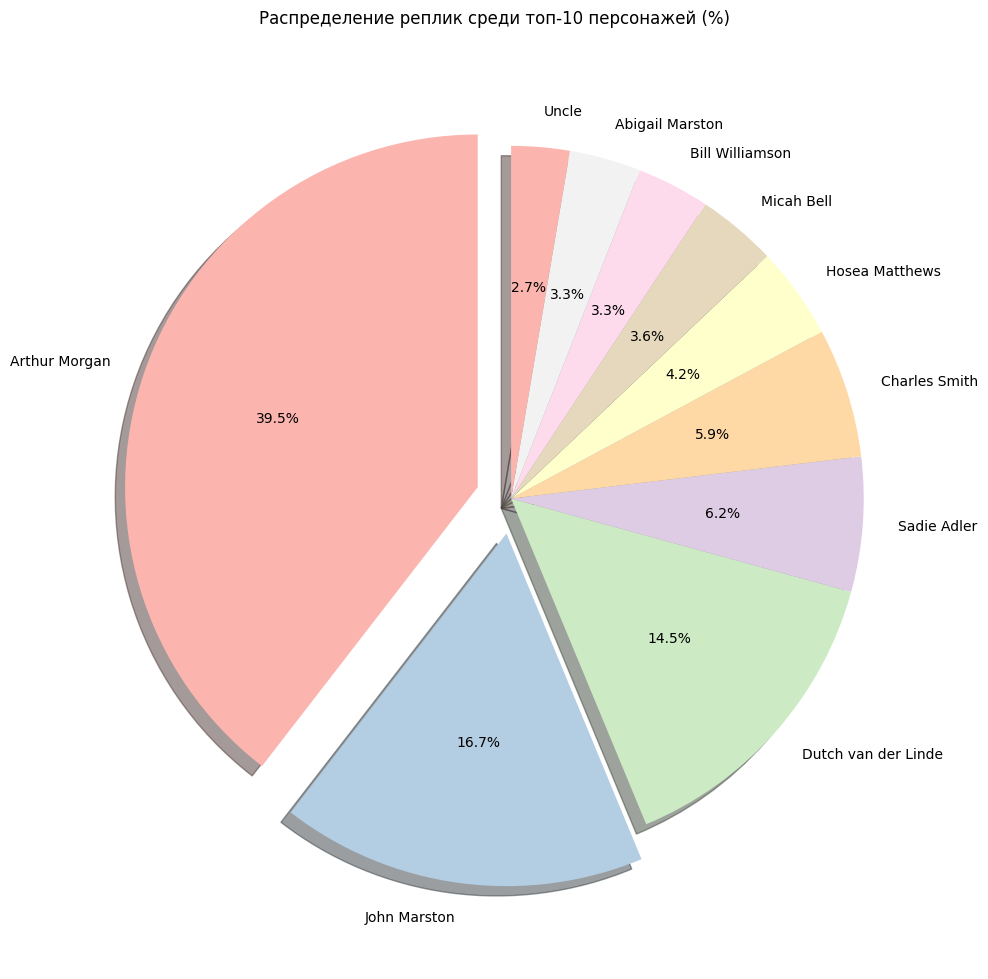

In [17]:
explode = [0.1 if name == "Arthur Morgan" or name == "John Marston" else 0 for name in character_counts.index]

plt.figure(figsize=(10, 10))
plt.pie(
    character_counts,
    labels=character_counts.index,
    autopct='%1.1f%%',  
    startangle=90,
    explode=explode,      
    shadow=True,        
    colors=plt.cm.Pastel1.colors  
)

plt.title('Распределение реплик среди топ-10 персонажей (%)', pad=20)
plt.axis('equal')  
plt.tight_layout()
plt.show()

Топ-10 реплик персонажа 'Micah Bell':
23.1%:  Was you followed?...
15.4%:  Not far....
7.7%:  Gentlemen....
7.7%:  I think so. Found a little homestead down thatawa...
7.7%:  Sure. Place is blazing with light and noise. Soun...
7.7%:  Follow me. How’s Davey doing?...
7.7%:  That’s too bad. Davey was a real fighter. Both of...
7.7%:  And Mac and Sean?...
7.7%:  Quite a business…...
7.7%:  Always....


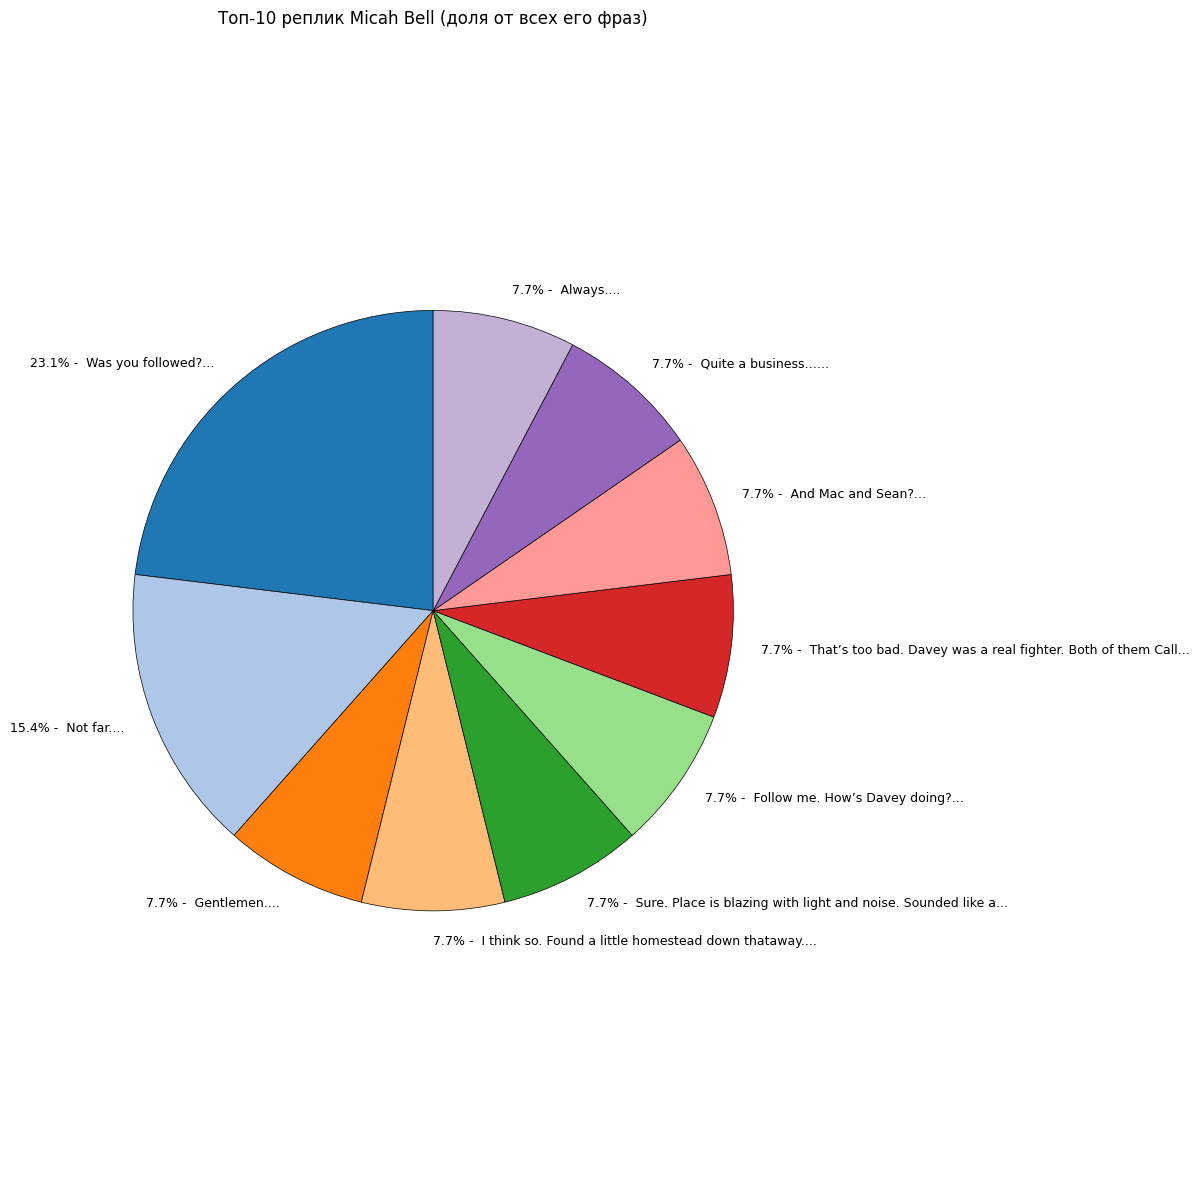

In [18]:
character_name = input('Введите имя персонажа, чьи фразы вы хотите посмотреть: ')
character_lines = data[data['name'] == character_name]['line']

top_phrases = Counter(character_lines).most_common(10)
phrases, counts = zip(*top_phrases)  

total = sum(counts)
percentages = [round((count / total) * 100, 1) for count in counts]

print(f"Топ-10 реплик персонажа '{character_name}':")
for phrase, percent in zip(phrases, percentages):
    print(f"{percent}%: {phrase[:50]}...")  

plt.figure(figsize=(12, 12))
plt.pie(
    counts,
    labels=[f"{p}% - {s[:60]}..." for p, s in zip(percentages, phrases)],  
    autopct='',  
    startangle=90,
    colors=plt.cm.tab20.colors,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 9}  
)

plt.title(f'Топ-10 реплик {character_name} (доля от всех его фраз)', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()